<a href="https://colab.research.google.com/github/FeedingDejaj/MAT421/blob/main/ModHpt2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 22.4 Numerical Error and Instability

- **Accuracy vs. Stability:**  
  - Accuracy measures how close a numerical solution is to the true solution as h→0 (order notation O(hᵖ)).  
  - Stability describes whether errors grow or remain bounded as the integration proceeds.

- **Test Problem (Pendulum):**  
  - Equation: θ″ + (g/l) θ = 0  ⇒  state S = [θ, ω]ᵀ,  dS/dt = [ω, –(g/l) θ]ᵀ.  
  - Parameters: ω = √(g/l) = 4, initial S₀ = [1, 0], t ∈ [0, 5], h = 0.1.

- **Schemes Compared:**  
  - **Explicit Euler:**  S_{n+1} = M_e·S_n, unstable (amplitude grows).  
  - **Implicit Euler:**  S_{n+1} = M_i·S_n, unphysical damping (decays).  
  - **Trapezoidal (Crank–Nicolson):**  S_{n+1} = M_t·S_n, stable, preserves amplitude but phase‐lags.


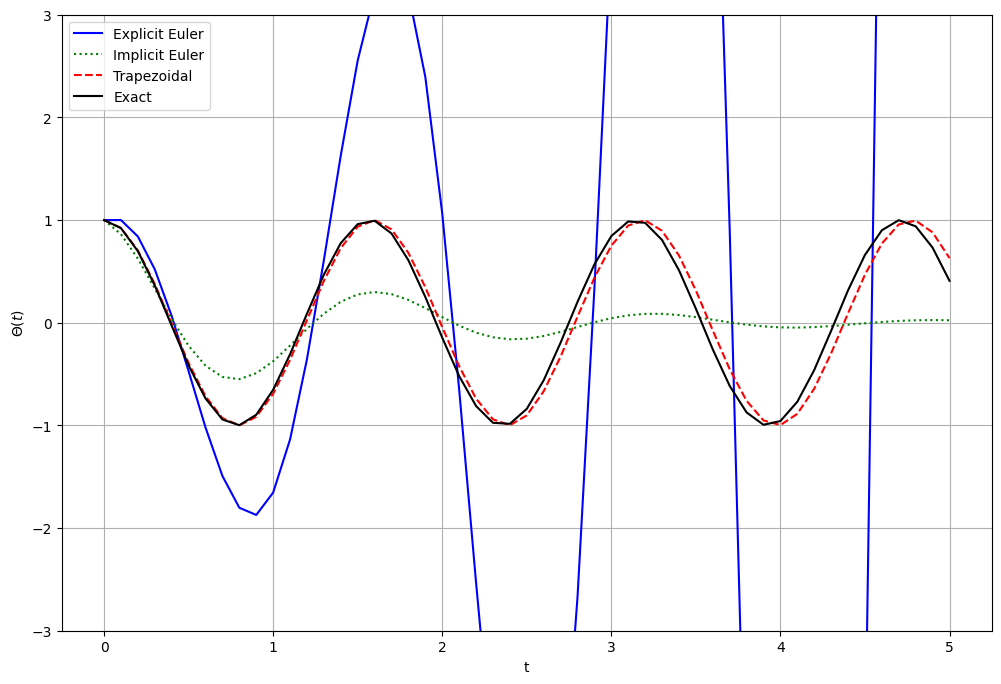

In [2]:
import numpy as np
from numpy.linalg import inv
import matplotlib.pyplot as plt

h = 0.1
t = np.arange(0, 5+h, h)
w = 4.0
s0 = np.array([[1.0], [0.0]])
m_e = np.array([[1, h], [-w**2*h, 1]])
m_i = inv(np.array([[1, -h], [w**2*h, 1]]))
m_t = inv(np.array([[1, -h/2], [w**2*h/2, 1]])) @ np.array([[1, h/2], [-w**2*h/2, 1]])
s_e = np.zeros((len(t), 2))
s_i = np.zeros((len(t), 2))
s_t = np.zeros((len(t), 2))
s_e[0] = s0.T
s_i[0] = s0.T
s_t[0] = s0.T
for j in range(len(t)-1):
    s_e[j+1] = (m_e @ s_e[j].reshape(2,1)).flatten()
    s_i[j+1] = (m_i @ s_i[j].reshape(2,1)).flatten()
    s_t[j+1] = (m_t @ s_t[j].reshape(2,1)).flatten()

plt.figure(figsize=(12,8))
plt.plot(t, s_e[:,0], 'b-')
plt.plot(t, s_i[:,0], 'g:')
plt.plot(t, s_t[:,0], 'r--')
plt.plot(t, np.cos(w*t), 'k')
plt.ylim([-3, 3])
plt.xlabel('t')
plt.ylabel(r'$\Theta(t)$')
plt.legend(['Explicit Euler','Implicit Euler','Trapezoidal','Exact'])
plt.grid(True)
plt.show()




---



# 22.5 Predictor–Corrector Methods

- Predictor–Corrector schemes use an explicit “predictor” step to estimate the solution at the next time level and then a “corrector” step (often implicit) to refine that estimate.
- **Midpoint PC example:**  
  Predictor:  yₙ₊₁/₂ = yₙ + (h/2)·f(tₙ, yₙ)  
  Corrector:  yₙ₊₁   = yₙ +  h  ·f(tₙ + h/2, yₙ₊₁/₂)  
- This yields a second‐order method (error O(h²)), improving on Euler’s O(h) global error.

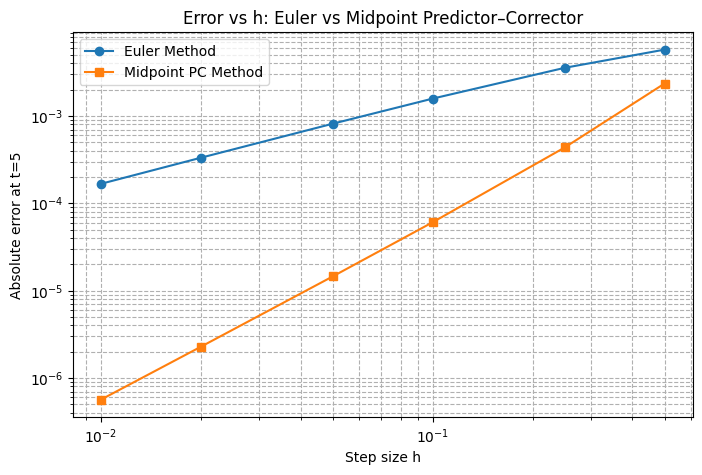

In [3]:
import numpy as np
import matplotlib.pyplot as plt

f = lambda t, y: -y
t0, y0, T = 0.0, 1.0, 5.0

def euler_step(t, y, h):
    return y + h * f(t, y)

def midpoint_pc_step(t, y, h):
    y_half = y + (h/2) * f(t, y)
    return y + h * f(t + h/2, y_half)

hs = np.array([0.5, 0.25, 0.1, 0.05, 0.02, 0.01])
errors_euler = []
errors_pc = []

for h in hs:
    N = int((T - t0)/h)
    t, y_e, y_pc = t0, y0, y0
    for _ in range(N):
        y_e = euler_step(t, y_e, h)
        y_pc = midpoint_pc_step(t, y_pc, h)
        t += h
    exact = np.exp(-T)
    errors_euler.append(abs(y_e - exact))
    errors_pc.append(abs(y_pc - exact))

plt.figure(figsize=(8,5))
plt.loglog(hs, errors_euler, 'o-', label='Euler Method')
plt.loglog(hs, errors_pc,    's-', label='Midpoint PC Method')
plt.xlabel('Step size h')
plt.ylabel('Absolute error at t=5')
plt.title('Error vs h: Euler vs Midpoint Predictor–Corrector')
plt.legend()
plt.grid(True, which='both', ls='--')
plt.show()
